# Tests library module

In [1]:
import math
import pandas as pd
import numpy as np
from importlib import reload
from fuzzywuzzy import process, fuzz

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
# 'style' the plot like fivethirtyeight.com website
style.use('bmh')

/home/tabb99/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
rcParams['figure.figsize']= (10, 8)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

In [3]:
import heatpump.library as library

In [56]:
reload(library)

<module 'heatpump.library' from '/home/tabb99/heat-pump-calc/heatpump/library.py'>

In [5]:
library.cities()[:5]

[('Adak', 2), ('Akhiok', 283), ('Akiachak', 84), ('Akiak', 85), ('Akutan', 3)]

In [40]:
library.city_from_id(1)

Name                                                         Anchorage
Latitude                                                        61.152
Longitude                                                     -149.864
ERHRegionID                                                          2
WAPRegionID                                                          2
FuelRefer                                                        False
FuelCityID                                                         NaN
Oil1Price                                                         3.07
Oil2Price                                                          NaN
PropanePrice                                                       4.5
BirchPrice                                                         325
SprucePrice                                                        345
CoalPrice                                                          175
SteamPrice                                                         NaN
HotWat

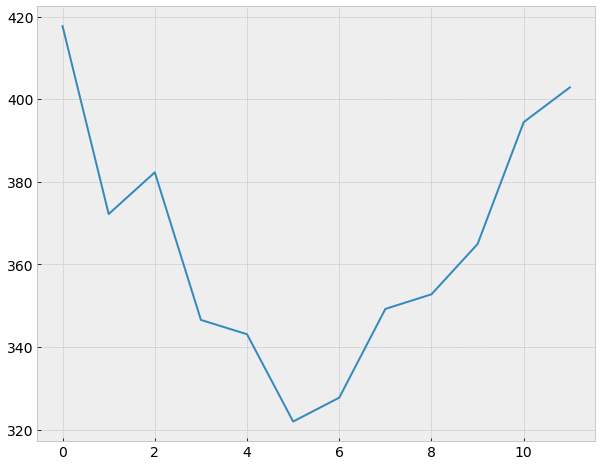

In [44]:
plot(library.city_from_id(120).avg_elec_usage)

In [7]:
library.miscellaneous_info()

ID                                                                      1
LibVersion                                            2018-04-04 00:00:00
DiscountRate                                                         0.03
RegSurcharge                                                       0.0032
RegSurchargeElectric                                               0.0009
PCEkWhLimit                                                           500
PCEFundingPct                                                           1
MiscNotes               Inflation factors and discount rate from 2011 ...
Name: 0, dtype: object

In [8]:
library.util_from_id(1)

ID                                                              1
Name                                Chugach Electric- Residential
Active                                                       True
Type                                                            1
IsCommercial                                                False
ChargesRCC                                                   True
PCE                                                             0
CO2                                                           1.1
CustomerChg                                                     8
DemandCharge                                                  NaN
NameShort                                                  Chugac
Blocks          [(nan, 0.18647000112105194), (nan, nan), (nan,...
Name: 1, dtype: object

In [9]:
print(library.util_from_id(1).Blocks)
print(library.util_from_id(383).Blocks)

[(nan, 0.18647000112105194), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]
[(100.0, 0.817300021299161), (400.0, 0.742400020011701), (500.0, 0.667500018724241), (1000.0, 0.592500000842847), (nan, 0.562600016244688)]


In [23]:
library.fuels()

[('Electricity', 1),
 ('Natural Gas', 2),
 ('Propane', 3),
 ('#1 Oil', 4),
 ('#2 Oil', 5),
 ('Birch Wood', 6),
 ('Spruce Wood', 7),
 ('Coal', 8),
 ('District Heat, Steam', 9),
 ('District Heat, Hot Water', 10)]

In [35]:
fu = library.fuel_from_id(2)
fu

desc                                                   Natural Gas
unit                                                           ccf
btus                                                        103700
co2                                                            117
price_col                                                 GasPrice
effic_choices    [(Standard, 80), (High Efficiency Condensing, ...
Name: 2, dtype: object

In [5]:
fu = library.fuel_from_id(2)
choices = [{'label': lbl, 'value': val} for lbl, val in fu.effic_choices]
choices

[{'label': 'Standard', 'value': 80},
 {'label': 'High Efficiency Condensing', 'value': 95}]

In [29]:
library.fuel_price(5, 1)

nan

In [13]:
%time library.tmy_from_id(702070).head()

Wall time: 446 ms


,db_temp,rh,wind_spd,month
timestamp,,,,
2018-01-01 00:30:00,14.18,54,26.395892,1
2018-01-01 01:30:00,14.00,59,23.711564,1
2018-01-01 02:30:00,13.82,58,27.961750,1
2018-01-01 03:30:00,13.64,58,28.409138,1
2018-01-01 04:30:00,13.46,58,25.948504,1


In [14]:
import heatpump.elec_cost as elec_cost
reload(elec_cost)

<module 'heatpump.elec_cost' from 'C:\\Users\\Alan\\Documents\\GitHub\\heat-pump-calc\\heatpump\\elec_cost.py'>

In [15]:
util_id = 383
#util_id = 1
ec = elec_cost.ElecCostCalc(util_id)
print(ec.utility)
print(ec.utility.Blocks)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, sales_tax=1.)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=200)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=math.nan)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=0)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, blocks=[(400, 0.22), (math.nan, 0.18)], pce=0.1, pce_limit=200, sales_tax=0.1)
print(ec.final_blocks())

ID                                                            383
Name                  Gwitchyaa Zhee Utility Co - Commercial - Sm
Active                                                       True
Type                                                            1
IsCommercial                                                 True
ChargesRCC                                                   True
PCE                                                         0.371
CO2                                                             2
CustomerChg                                                     0
DemandCharge                                                  NaN
NameShort                                                  Gwitch
Blocks          [(100.0, 0.817300021299161), (400.0, 0.7424000...
Name: 383, dtype: object
[(100.0, 0.817300021299161), (400.0, 0.742400020011701), (500.0, 0.667500018724241), (1000.0, 0.592500000842847), (nan, 0.562600016244688)]
[(100.0, 0.44630002940539304), (300.0, 0.37

In [16]:
util_id = 480  # ML&P Large Commercial
ec = elec_cost.ElecCostCalc(util_id)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1, demand_charge=10., customer_charge=5.)
print(ec.demand_charge, ec.customer_charge)

23.2900009155273 44.1500015258789
25.619001007080033 48.56500167846679
11.0 5.5


In [18]:
library.city_from_id(1).ElecUtilities

[('Anchorage ML&P - Residential', 2),
 ('Anchorage ML&P - Commercial - Sm', 293),
 ('Anchorage ML&P - Commercial - Lg', 480),
 ('Chugach Electric- Residential', 1),
 ('Chugach Electric - Commercial - Sm', 361),
 ('Chugach Electric - Commercial - Lg', 548)]

In [19]:
ec = elec_cost.ElecCostCalc(480, sales_tax=0.1, demand_charge=13.29, customer_charge=34.15)
ec.monthly_cost(700, 2)

137.45819846160896

In [20]:
print(ec.utility)
print(ec.utility.Blocks)

ID                                                            480
Name                             Anchorage ML&P - Commercial - Lg
Active                                                       True
Type                                                            1
IsCommercial                                                 True
ChargesRCC                                                   True
PCE                                                           NaN
CO2                                                           1.1
CustomerChg                                                 44.15
DemandCharge                                                23.29
NameShort                                                  Anchor
Blocks          [(nan, 0.09175999800208955), (nan, nan), (nan,...
Name: 480, dtype: object
[(nan, 0.09175999800208955), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]


Adak - TDX Commercial: $0.95/kWh
Healy Lake-APT - Commercial - Lg: $1.17/kWh
Healy Lake-APT - Commercial - Sm: $0.93/kWh
Homer Electric Assn - Industrial: $1.07/kWh
Lime Village - Commercial - Lg: $0.96/kWh
Lime Village - Commercial - Sm: $0.99/kWh
Lime Village - Residential: $0.99/kWh
Paxson Lodge, Inc - Commercial - Lg: $1.70/kWh
Paxson Lodge, Inc - Commercial - Sm: $1.70/kWh
Paxson Lodge, Inc - Residential: $1.70/kWh
Self Generated Power (oil) - Residential: $1.00/kWh


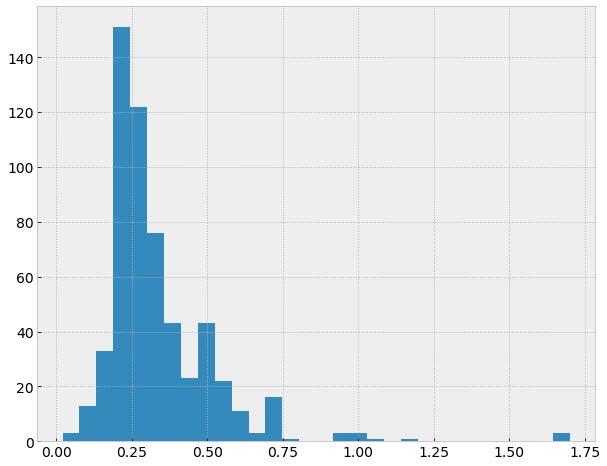

In [21]:
rates = []
for util_nm, util_id in library.utilities():
    ec = elec_cost.ElecCostCalc(util_id)
    if ec.utility.Type==2:
        continue
    rate = ec.monthly_cost(500., 1.7)/500.
    rates.append(rate)
    if rate > 0.8:
        print('{}: ${:.2f}/kWh'.format(util_nm, rate))
hist(rates, bins=30);

In [22]:
dfc = library.df_city.copy()
dfc['elec_count'] = [len(ut) for ut in dfc.ElecUtilities]
dfc.query('elec_count > 3')[['Name', 'ElecUtilities', 'elec_count']]

,Name,ElecUtilities,elec_count
ID,,,
1,Anchorage,"[(Anchorage ML&P - Residential, 2), (Anchorage...",6
11,Auke Bay,"[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
15,Delta Junction,"[(Golden Valley Electric - Residential, 3), (G...",5
19,Cantwell,"[(Golden Valley Electric - Residential, 3), (G...",5
32,Clear,"[(Golden Valley Electric - Residential, 3), (G...",5
182,Healy,"[(Golden Valley Electric - Residential, 3), (G...",5
200,"Juneau, Airport","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
202,Wrangell,"[(Wrangell, City of - Residential, 128), (Wran...",6
292,"Juneau, City of","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6


In [23]:
dfc.tail()

,Name,Latitude,Longitude,ERHRegionID,WAPRegionID,FuelRefer,FuelCityID,Oil1Price,Oil2Price,PropanePrice,...,ElecUtilities,GasPrice,aris_city,census_city,census_area,ancsa_region,railbelt,hub,avg_elec_usage,elec_count
ID,,,,,,,,,,,,,,,,,,,,,
316,Atqasuk - Res,70.478737,-157.417252,6,5,False,0.0,1.40,NaN,8.47,...,"[(Nome Joint Utilities Systems - Residential, ...",NaN,Atqasuk,Atqasuk city,North Slope Borough,Arctic Slope Regional Corporation,Affordable Energy Strategy Area,False,"[814.1280577660001, 732.4086517019999, 677.820...",3
317,Kaktovik - Com,70.123009,-143.609299,6,5,False,0.0,6.00,NaN,6.00,...,"[(North Slope Borough Utilities - Residential,...",NaN,Kaktovik,Kaktovik city,North Slope Borough,Arctic Slope Regional Corporation,Affordable Energy Strategy Area,False,"[814.1280577660001, 732.4086517019999, 677.820...",3
318,Point Hope Com,68.347885,-166.769882,6,5,False,0.0,7.99,NaN,11.57,...,"[(North Slope Borough Utilities - Residential,...",NaN,Point Hope,Point Hope city,North Slope Borough,Arctic Slope Regional Corporation,Affordable Energy Strategy Area,False,"[814.1280577660001, 732.4086517019999, 677.820...",3
319,Wainwright Com,70.644905,-160.017776,6,5,False,0.0,7.30,NaN,14.62,...,"[(North Slope Borough Utilities - Residential,...",NaN,Wainwright,Wainwright city,North Slope Borough,Arctic Slope Regional Corporation,Affordable Energy Strategy Area,False,"[814.1280577660001, 732.4086517019999, 677.820...",3
322,Faribanks - Chena Ridge,64.803688,-148.009293,4,4,True,293.0,2.89,NaN,3.99,...,"[(Golden Valley Electric - Residential, 3), (G...",2.081,Fairbanks - Chena Ridge,Fairbanks city,Fairbanks North Star Borough,Doyon,Railbelt,True,"[674.3176110825001, 616.54369648225, 568.80201...",5


In [24]:
dfc.loc[301].ElecUtilities

[('AEL&P - Residential', 11),
 ('AEL&P - Residential Demand', 659),
 ('AEL&P - Residential Heat Pump', 663),
 ('AEL&P - Sm Commercial', 289),
 ('AEL&P - Lg Commercial', 476),
 ('AEL&P -  Sm Commercial Demand', 660)]

In [25]:
df_city = library.df_city
df_util = library.df_util
for ix, cty in df_city.iterrows():
    util_ids = [id for nm, id in cty.ElecUtilities]
    pces = df_util.loc[util_ids].PCE
    pce_vals = pces[pces > 0.0]
    pce_max = pces.max()
    if pce_max > 0:
        print(cty.Name, pces.values, pce_max, util_ids)

Adak [0.47870001 0.47870001] 0.478700011968613 [677, 678]
Akutan [0.77420002 0.77420002 0.77420002] 0.774200022220612 [9, 288, 475]
Allakaket [0.5 0.5 0.5] 0.5 [249, 291, 478]
Angoon [0.28960001 0.28960001 0.28960001] 0.289600014686584 [283, 393, 580]
Aniak [0.30109999 0.30109999 0.30109999] 0.301099985837936 [17, 295, 482]
Arctic Village [0.78299999 0.78299999 0.78299999] 0.782999992370605 [18, 296, 483]
Atka [0.2386 0.2386 0.2386] 0.238600000739098 [16, 294, 481]
Bethel [0.1155 0.1155 0.1155] 0.115500003099442 [23, 350, 537]
Bettles [0.36000001 0.36000001 0.36000001] 0.360000014305115 [250, 351, 538]
Central [0.3145 0.3145 0.3145] 0.314500004053116 [33, 354, 541]
Chalkyitsik [0.33939999 0.33939999 0.33939999] 0.339399993419647 [277, 355, 542]
Chignik [0.2402 0.2402 0.2402] 0.240199998021126 [31, 358, 545]
Chitina [0.33360001 0.33360001 0.33360001] 0.333600014448166 [32, 360, 547]
Circle [0.3145 0.3145 0.3145] 0.314500004053116 [33, 354, 541]
Coffman Cove [0.03 0.03 0.03] 0.0299999993

In [26]:
choices = df_city.Name.values
df_city.index.min()

1

In [27]:
# Phonetic matching of a city name to a list of cities
# This takes about 11 ms to do:  x 250 cities
cty = 'anakt'
process.extract(cty, choices)

[('Anaktuvuk Pass - C', 90),
 ('Anaktuvuk Pass Res', 90),
 ('Aniak', 80),
 ('Kongiganak', 80),
 ('Adak', 67)]

## Heat Pump List

In [58]:
reload(library)
library.heat_pump_manufacturers('Single')

['American Standard',
 'American Standard/Mitsubishi Electric',
 'Arcoaire',
 'Bosch',
 'Bryant',
 'Carrier',
 'Comfortmaker',
 'Daikin',
 'Day & Night',
 'Emi',
 'Frigidaire',
 'Emerson Quiet Kool',
 'Friedrich',
 'Fujitsu',
 'Lennox',
 'Direct Air',
 'Comfort-Aire/Century',
 'Willis',
 'Gree',
 'Tosot',
 'Haier',
 'Heil',
 'Keeprite',
 'Tempstar',
 'Kenmore',
 'Lg',
 'Midea',
 'Novair',
 'Mitsubishi',
 'Mitsubishi Electric',
 'Ouellet',
 'Panasonic',
 'Payne',
 'Samsung',
 'Trane/Mitsubishi Electric',
 'Trane']

In [62]:
library.heat_pump_manufacturers('Multi', efficient_only=True)

['American Standard/Mitsubishi Electric',
 'Daikin',
 'Fujitsu',
 'Gree',
 'Tosot',
 'Lg',
 'Mitsubishi',
 'Mitsubishi Electric',
 'Samsung',
 'Trane/Mitsubishi Electric']

In [63]:
reload(library)
library.heat_pump_models('Gree', zones='Single', efficient_only=False)

[('Outdoor: GWH12YD-D3DNA1A/O In: GWH12AAD-D3DN***/I, 5°F Max 8,000 Btu/hr, HSPF 14.0',
  687),
 ('Outdoor: SAP12HP230V1AO In: SAP12HP230V1AH, 5°F Max 8,000 Btu/hr, HSPF 14.0',
  662),
 ('Outdoor: GWH12QC-A3DNA1D/O In: GWH12QC-A3DN***/I, 5°F Max 8,611 Btu/hr, HSPF 10.2',
  674),
 ('Outdoor: VIR12HP115V1BO In: VIR12HP115V1BH, 5°F Max 8,611 Btu/hr, HSPF 10.2',
  655),
 ('Outdoor: GWH09QC-A3DNA1D/O In: GWH09QC-A3DN***/I, 5°F Max 8,680 Btu/hr, HSPF 10.5',
  673),
 ('Outdoor: VIR09HP115V1BO In: VIR09HP115V1BH, 5°F Max 8,680 Btu/hr, HSPF 10.5',
  654),
 ('Outdoor: VIR12HP230V1BO In: VIR12HP230V1BH, 5°F Max 8,800 Btu/hr, HSPF 11.0',
  660),
 ('Outdoor: GWH12QC-D3DNA1D/O In: GWH12QC-D3DN***/I, 5°F Max 8,800 Btu/hr, HSPF 11.0',
  676),
 ('Outdoor: VIR09HP230V1BO In: VIR09HP230V1BH, 5°F Max 9,171 Btu/hr, HSPF 10.5',
  656),
 ('Outdoor: GWH09QC-D3DNA1D/O In: GWH09QC-D3DN***/I, 5°F Max 9,171 Btu/hr, HSPF 10.5',
  675),
 ('Outdoor: GWH09UC-D3DNA4C/O In: GWH09UC-D3DN***/I, 5°F Max 10,488 Btu/hr, HSP

In [64]:
library.heat_pump_from_id(685)

brand                            Gree
ahri_num                      9123256
zones                          Single
outdoor_model       GWH24YE-D3DNA1A/O
indoor_model       GWH24AAE-D3DN***/I
hspf                               12
in_pwr_5F_max                     3.2
capacity_5F_max                 22553
in_pwr_47F_min                   0.38
popular                          True
Name: 685, dtype: object

In [16]:
dfht = library.df_heatpumps
dfht.head()

,brand,ahri_num,zones,outdoor_model,indoor_model,hspf,in_pwr_5F_max,capacity_5F_max,in_pwr_47F_min,cop_5F_max,cop_17F_max,cop_47F_max
0,Acd,202110483,Single,UHD09KCH38S-O,UHD09KCH38S-I,15.0,1.82,12977.0,0.20,2.089661,2.405652,2.657178
1,Acd,201863350,Single,OCD09KCH23S-O,OCD09KCH23S-I,10.5,1.33,9171.0,0.16,2.020868,2.183096,2.605076
2,Acd,202110500,Multi,MPD30KCH21S-O,Non-Ducted Indoor Units,11.5,3.01,19356.0,1.05,1.884613,3.126091,3.584757
3,Acd,202110494,Multi,MPD18KCH22S-O,Non-Ducted Indoor Units,11.0,2.30,13450.0,0.75,1.713829,2.415259,2.365502
4,Acd,202132789,Single,UHD24KCH22S-O,UHD24KCH22S-I,12.0,3.20,22553.0,0.38,2.065510,2.277197,2.534669


In [53]:
dfht.query('zones == "Multi"').nlargest(20, 'hspf')

,brand,ahri_num,zones,outdoor_model,indoor_model,hspf,in_pwr_5F_max,capacity_5F_max,in_pwr_47F_min,cop_5F_max,cop_17F_max,cop_47F_max
534,Daikin,201851575,Multi,3MXS24RMVJU,CTXS07LVJU+CTXS09LVJU+CTXS09LVJU,12.5,2.460,18930.0,0.430,2.260000,2.720000,3.550000
535,Daikin,201851577,Multi,3MXL24RMVJU,CTXS07LVJU+CTXS09LVJU+CTXS09LVJU,12.5,2.920,21600.0,0.440,2.170000,2.550000,3.410000
546,Daikin,8103869,Multi,3MXS24NMVJU,CTXS07LVJU+CTXS09LVJU+CTXS09LVJU,12.5,2.460,18930.0,0.430,2.260000,2.720000,3.550000
553,Daikin,8849539,Multi,3MXL24QMVJU,CTXS07LVJU+FTXS09LVJU+FTXS09LVJU,12.5,2.920,21600.0,0.440,2.170000,2.550000,3.410000
140,American Standard/Mitsubishi Electric,202102457,Multi,PUMY-P48NKMU*,Non-Ducted Indoor Units,11.7,4.849,36400.0,0.784,2.199997,2.499912,3.799721
1143,Mitsubishi Electric,201754447,Multi,PUMY-P48NKMU1,Non-ducted,11.7,4.849,36400.0,0.784,2.199997,2.499912,3.799721
1230,Trane/Mitsubishi Electric,202102772,Multi,PUMY-P48NKMU*,Non-Ducted Indoor Units,11.7,4.849,36400.0,0.784,2.199997,2.499912,3.799721
2,Acd,202110500,Multi,MPD30KCH21S-O,Non-Ducted Indoor Units,11.5,3.010,19356.0,1.050,1.884613,3.126091,3.584757
10,Acd,202110503,Multi,MPD36KCH21S-O,Non-Ducted Indoor Units,11.5,3.120,21356.0,1.250,2.006034,2.732018,3.610961
138,American Standard/Mitsubishi Electric,202102456,Multi,PUMY-P36NKMU*,Non-Ducted Indoor Units,11.5,3.695,29000.0,0.620,2.300152,2.700049,3.895248


In [44]:
len(dfht.query('zones == "Multi" and hspf >= 12.5'))

87

In [48]:
hp_id = -2
gen_hp = dfht.iloc[0].copy()
gen_hp['brand'] =  'Generic'
gen_hp['ahri_num'] = 0
gen_hp['zones'] =  'Single' if hp_id == -1 else 'Multi'
gen_hp['outdoor_model'] =  'Generic'
gen_hp['indoor_model'] =  'Generic'
for prop in ('hspf', 'in_pwr_5F_max', 'capacity_5F_max', 'in_pwr_47F_min',
            'cop_5F_max', 'cop_17F_max', 'cop_47F_max'):
    gen_hp[prop] = np.nan
gen_hp

brand              Generic
ahri_num                 0
zones                Multi
outdoor_model      Generic
indoor_model       Generic
hspf                   NaN
in_pwr_5F_max          NaN
capacity_5F_max        NaN
in_pwr_47F_min         NaN
cop_5F_max             NaN
cop_17F_max            NaN
cop_47F_max            NaN
Name: 0, dtype: object

In [50]:
dfht.query('outdoor_model =="AOU12RLS3"')

,brand,ahri_num,zones,outdoor_model,indoor_model,hspf,in_pwr_5F_max,capacity_5F_max,in_pwr_47F_min,cop_5F_max,cop_17F_max,cop_47F_max
601,Fujitsu,7993242,Single,AOU12RLS3,ASU12RLS3,14.0,2.1,16500.0,0.2,2.3,2.49,3.34
613,Fujitsu,8703350,Single,AOU12RLS3,ASU12RLS3Y,14.0,2.1,16500.0,0.2,2.3,2.49,3.34


In [60]:
library.heat_pump_from_id(-4)

brand              Generic
ahri_num                 0
zones                Multi
outdoor_model      Generic
indoor_model       Generic
hspf                  11.7
in_pwr_5F_max        4.849
capacity_5F_max      36400
in_pwr_47F_min         NaN
cop_5F_max             NaN
cop_17F_max            NaN
cop_47F_max            NaN
Name: 0, dtype: object